In [1]:
import sys
import os
sys.path.append("../scripts/")

import score_result

import networkx as nx
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import glob

experiments = [
    os.path.basename(p)[:-len("_best_tree.txt")] for p in glob.glob("../realdata/pairtree/*_best_tree.txt")
]

experiments

['SJBALL022611',
 'SJBALL022610steph',
 'POP66_CPT_Short_66_G0',
 'SJETV010stephR1R2',
 'SJBALL022613',
 'CSC28_BRCD_CPT-11',
 'SJETV010stephR2',
 'SJETV043',
 'CSC28',
 'POP66_BRCD_Saline',
 'POP66_BRCD_DMSO',
 'POP66',
 'POP66_CPT_Short_66_CPT_39D4',
 'SJBALL022609',
 'POP66_CPT_Long_66_TR1',
 'SJETV010',
 'SJETV047',
 'POP66_CPT_Long_Primary',
 'SJBALL036',
 'SJETV010nohypermut',
 'POP66_CPT_Long_G0',
 'SJBALL022610',
 'POP66_CPT_Short_66_T5_3',
 'SJMLL039',
 'SJBALL022612',
 'SJMLL026',
 'POP66_CPT_Long_66_TR8',
 'CSC28_BRCD_Saline',
 'CSC28_BRCD_DMSO',
 'SJETV010stephR1',
 'POP66_CPT_Long_66_TR7',
 'CSC28_G0',
 'POP66_CPT_Short_Primary',
 'SJBALL022614',
 'POP66_T0_Cell_Line',
 'SJERG009',
 'SJBALL031']

In [7]:
def infer_matrices(freq_matrix, tree):
    clonal_matrix = score_result.construct_clonal_matrix(tree, len(tree.nodes))
    usage_matrix = score_result.one_vafpp_linear_program(clonal_matrix, freq_matrix)[0]
    return clonal_matrix, usage_matrix
    
instances = []
for exp in experiments:
    if "POP66" in exp or "CSC28" in exp: continue
        
    freq_matrix = np.loadtxt(f"../realdata/allele_minima/{exp}_frequency_matrix.txt")
    if len(freq_matrix.shape) == 1:
        freq_matrix = freq_matrix.reshape((1, len(freq_matrix)))
        
    samples = pd.read_csv(f"../realdata/allele_minima/{exp}_samples.txt", header=None)
        
    pt = nx.read_adjlist(f"../realdata/pairtree/{exp}_best_tree.txt", nodetype=int, create_using=nx.DiGraph)
    am = nx.read_adjlist(f"../realdata/allele_minima/{exp}_inferred_tree.txt", nodetype=int, create_using=nx.DiGraph)

    am_clonal, am_usage = infer_matrices(freq_matrix, am)
    pt_clonal, pt_usage = infer_matrices(freq_matrix, pt)
        
    instances.append(
        {
            "experiment": exp, "am_usage": am_usage, "pt_usage": pt_usage,
            "frequency_matrix": freq_matrix, "am": am, "am_clonal": am_clonal,
            "pt": pt, "pt_clonal": pt_clonal, "samples": samples
        }
    )    


Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU E5-2670 v3 @ 2.30GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 24 physical cores, 48 logical processors, using up to 24 threads

Optimize a model with 551 rows, 522 columns and 2349 nonzeros
Model fingerprint: 0xf21deae3
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-04, 1e+00]
Presolve removed 94 rows and 94 columns
Presolve time: 0.01s
Presolved: 457 rows, 428 columns, 1860 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   9.433370e+01   0.000000e+00      0s
     226    5.4300000e-01   0.000000e+00   0.000000e+00      0s

Solved in 226 iterations and 0.01 seconds (0.00 work units)
Optimal objective  5.430000000e-01
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU E5-2670 v3 @ 2.30GHz, instructio

Thread count: 24 physical cores, 48 logical processors, using up to 24 threads

Optimize a model with 3135 rows, 3078 columns and 32433 nonzeros
Model fingerprint: 0x791a7abd
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-04, 1e+00]
Presolve removed 806 rows and 806 columns
Presolve time: 0.01s
Presolved: 2329 rows, 2272 columns, 22036 nonzeros

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.612e+04
 Factor NZ  : 4.022e+04 (roughly 2 MB of memory)
 Factor Ops : 9.656e+05 (less than 1 second per iteration)
 Threads    : 1

Barrier performed 0 iterations in 0.81 seconds (0.02 work units)
Barrier solve interrupted - model solved by another algorithm


Solved with dual simplex
Iteration    Objective       Primal Inf.    Dual Inf.      Time
    1267    2.3970500e+01   0.000000e+00   0.


CPU model: Intel(R) Xeon(R) CPU E5-2670 v3 @ 2.30GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 24 physical cores, 48 logical processors, using up to 24 threads

Optimize a model with 650 rows, 624 columns and 2860 nonzeros
Model fingerprint: 0x11184c6a
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-04, 1e+00]
Presolve removed 198 rows and 198 columns
Presolve time: 0.01s
Presolved: 452 rows, 426 columns, 1801 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   7.334890e+01   0.000000e+00      0s
     227    3.6680000e-01   0.000000e+00   0.000000e+00      0s

Solved in 227 iterations and 0.01 seconds (0.00 work units)
Optimal objective  3.668000000e-01
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU E5-2670 v3 @ 2.30GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 24 physical cores, 48

Presolve time: 0.01s
Presolved: 783 rows, 738 columns, 4505 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.716078e+02   0.000000e+00      0s
     386    1.4983000e+01   0.000000e+00   0.000000e+00      0s

Solved in 386 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.498300000e+01
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU E5-2670 v3 @ 2.30GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 24 physical cores, 48 logical processors, using up to 24 threads

Optimize a model with 816 rows, 768 columns and 2976 nonzeros
Model fingerprint: 0x905c2b58
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-04, 1e+00]
Presolve removed 320 rows and 320 columns
Presolve time: 0.00s
Presolved: 496 rows, 448 columns, 1620 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf

  RHS range        [8e-04, 1e+00]
Presolve removed 26 rows and 26 columns
Presolve time: 0.00s
Presolved: 143 rows, 130 columns, 499 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   3.234110e+01   0.000000e+00      0s
      65    4.0200000e-02   0.000000e+00   0.000000e+00      0s

Solved in 65 iterations and 0.01 seconds (0.00 work units)
Optimal objective  4.020000000e-02
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU E5-2670 v3 @ 2.30GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 24 physical cores, 48 logical processors, using up to 24 threads

Optimize a model with 169 rows, 156 columns and 676 nonzeros
Model fingerprint: 0x7e4e7a51
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e-04, 1e+00]
Presolve removed 26 rows and 26 columns
Presolve time: 0.00s
Presolved: 143 rows, 130 columns

In [8]:
"""                                                                                                                                                                           [40/1962]
Computes the set of all pairwise relations in a directed tree.
"""      
def get_relations(tree):                                                                   
    relations = set()
    for u in tree.nodes():
        for v in tree.nodes(): 
            if u == v:                 
                continue               
                                                                                           
            if nx.has_path(tree, u, v):                                                    
                relations.add((u, v))                                                      
                                                                                           
    return relations

def compute_sum_condition_violation(tree, frequency_matrix):
    m, n = frequency_matrix.shape
    violation = np.zeros(m)
    for i in range(m):
        for j in range(n):
            child_sum = 0
            for k in tree[j]:
                child_sum += frequency_matrix[i,k]
                
            violation[i] += max(0, child_sum - frequency_matrix[i, j])
    return violation
            
rows = []
for inst in instances:
    am_error = inst["frequency_matrix"] - (inst["am_usage"] @ inst["am_clonal"])
    pt_error = inst["frequency_matrix"] - (inst["pt_usage"] @ inst["pt_clonal"])
    am_rels  = set(inst['pt'].edges) # get_relations(inst['pt'])
    pt_rels  = set(inst['am'].edges) # get_relations(inst['am'])
    sym_diff = (am_rels - pt_rels) | (pt_rels - am_rels)
    
    am_sum_cond_violation = compute_sum_condition_violation(inst['am'], inst['frequency_matrix'])
    pt_sum_cond_violation = compute_sum_condition_violation(inst['pt'], inst['frequency_matrix'])

    row = {
        "experiment": inst["experiment"],
        "am_l1_usage": np.abs(inst["am_usage"]).sum(),
        "am_l0_usage": (np.abs(inst["am_usage"]) != 0).sum(),
        "pt_l1_usage": np.abs(inst["pt_usage"]).sum(),
        "pt_l0_usage": (np.abs(inst["pt_usage"]) != 0).sum(),
        "am_l1_frequency": np.abs(am_error).sum(),
        "pt_l1_frequency": np.abs(pt_error).sum(),
        "am_l0_frequency": (am_error != 0).sum(),
        "pt_l0_frequency": (pt_error != 0).sum(),
        "am_sum_condition_violation": am_sum_cond_violation,
        "pt_sum_condition_violation": pt_sum_cond_violation,
        "am_total_sum_condition_violation": am_sum_cond_violation.sum(),
        "pt_total_sum_condition_violation": pt_sum_cond_violation.sum(),
        "relationship_symm_dif": len(sym_diff),
        "m": inst["frequency_matrix"].shape[0],
        "n": inst["frequency_matrix"].shape[1],
        "instance_size": inst["frequency_matrix"].shape[0] * inst["frequency_matrix"].shape[1],
        "identical": set(inst["am"].edges()) == set(inst["pt"].edges())
    }
    
    rows.append(row)
    
sparsity_df = pd.DataFrame(rows)
sparsity_df = sparsity_df[~sparsity_df['experiment'].str.contains('steph')]
sparsity_df

,experiment,am_l1_usage,am_l0_usage,pt_l1_usage,pt_l0_usage,am_l1_frequency,pt_l1_frequency,am_l0_frequency,pt_l0_frequency,am_sum_condition_violation,pt_sum_condition_violation,am_total_sum_condition_violation,pt_total_sum_condition_violation,relationship_symm_dif,m,n,instance_size,identical
0,SJBALL022611,29.0,176,29.0,141,5.430000e-01,1.2772,52,89,"[0.0, 0.004, 0.0, 0.0027, 0.0, 0.0, 0.0029, 0....","[0.0, 0.004, 0.0, 0.0027, 0.002300000000000000...",0.4944,1.2430,8,29,9,261,False
3,SJBALL022613,20.0,144,20.0,128,6.267000e-01,0.9008,46,61,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0003000000000...","[0.0008, 0.0, 0.044900000000000016, 0.0029, 0....",0.6016,0.7990,8,20,10,200,False
5,SJETV043,42.0,239,42.0,217,4.218000e-01,0.7706,49,84,"[0.0, 0.0, 0.0, 0.0, 0.0018, 0.001700000000000...","[0.0, 0.034499999999999975, 0.0, 0.0, 0.0018, ...",0.4218,0.7631,10,42,9,378,False
6,SJBALL022609,90.0,646,90.0,598,6.123300e+00,6.7177,248,303,"[0.21760000000000004, 0.0011, 0.0016, 0.0049, ...","[0.22330000000000005, 0.0011, 0.0016, 0.011699...",6.0132,6.5268,12,90,18,1620,False
7,SJETV010,58.0,362,58.0,311,6.596000e-01,1.6798,43,110,"[0.0, 0.0377, 0.02150000000000002, 0.0, 0.0026...","[0.003200000000000036, 0.0401, 0.0215000000000...",0.6596,1.6727,10,58,9,522,False
8,SJETV047,33.0,158,33.0,152,1.860000e-02,0.1394,9,14,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0129999999999999, ...","[0.0, 0.0, 0.03189999999999993, 0.0, 0.0, 0.0,...",0.0186,0.1394,4,33,6,198,False
9,SJBALL036,26.0,186,26.0,146,3.668000e-01,1.0387,36,75,"[0.005099999999999993, 0.0, 0.0, 0.0, 0.000100...","[0.009199999999999986, 0.020199999999999937, 0...",0.3668,0.9987,16,26,12,312,False
10,SJETV010nohypermut,58.0,357,58.0,319,7.290000e-02,4.0993,60,94,"[0.00039999999999999996, 0.0002999999999999999...","[0.00039999999999999996, 0.0002999999999999999...",0.0729,4.0993,6,58,7,406,False
11,SJBALL022610,27.0,108,27.0,107,6.106227e-16,0.0131,5,4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0000,0.0131,2,27,4,108,False
12,SJMLL039,42.0,198,42.0,175,5.713000e-01,1.0543,48,89,"[0.0006000000000000001, 0.0043, 0.0013, 0.0, 0...","[0.0011, 0.0043, 0.0013, 0.0038, 0.005, 0.0017...",0.5593,1.0352,10,42,10,420,False


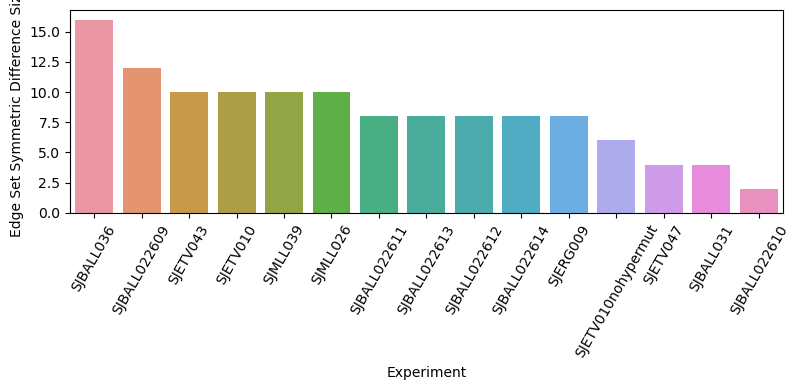

In [9]:
mask = sparsity_df['experiment'].str.contains('POP66') | sparsity_df['experiment'].str.contains('CSC28')

fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(data=sparsity_df[~mask].sort_values(by='relationship_symm_dif', ascending=False),x='experiment',y='relationship_symm_dif',ax=ax)
ax.set_xlabel('Experiment')
ax.set_ylabel('Edge Set Symmetric Difference Size')
for tick in ax.get_xticklabels():
    tick.set_rotation(60)
    
fig.tight_layout()
fig.savefig("../results/figures/real_data_edge_set_symm_diff.pdf")

In [10]:
sparsity_df['am_normalized_l1_error'] = sparsity_df.am_l1_frequency / sparsity_df.instance_size
sparsity_df['pt_normalized_l1_error'] = sparsity_df.pt_l1_frequency / sparsity_df.instance_size
sparsity_df['am_normalized_l0_usage_error'] = sparsity_df.am_l0_usage / sparsity_df.instance_size
sparsity_df['pt_normalized_l0_usage_error'] = sparsity_df.pt_l0_usage / sparsity_df.instance_size

l1_error_df = sparsity_df[['experiment','am_normalized_l1_error','pt_normalized_l1_error']].melt(id_vars='experiment')
l0_usage_error_df = sparsity_df[['experiment','am_normalized_l0_usage_error','pt_normalized_l0_usage_error']].melt(id_vars='experiment')
print(l1_error_df)
print(l0_usage_error_df)

            experiment                variable         value
0         SJBALL022611  am_normalized_l1_error  2.080460e-03
1         SJBALL022613  am_normalized_l1_error  3.133500e-03
2             SJETV043  am_normalized_l1_error  1.115873e-03
3         SJBALL022609  am_normalized_l1_error  3.779815e-03
4             SJETV010  am_normalized_l1_error  1.263602e-03
5             SJETV047  am_normalized_l1_error  9.393939e-05
6            SJBALL036  am_normalized_l1_error  1.175641e-03
7   SJETV010nohypermut  am_normalized_l1_error  1.795567e-04
8         SJBALL022610  am_normalized_l1_error  5.653914e-18
9             SJMLL039  am_normalized_l1_error  1.360238e-03
10        SJBALL022612  am_normalized_l1_error  2.300545e-02
11            SJMLL026  am_normalized_l1_error  7.460938e-04
12        SJBALL022614  am_normalized_l1_error  2.804167e-03
13            SJERG009  am_normalized_l1_error  5.393939e-04
14           SJBALL031  am_normalized_l1_error  5.153846e-04
15        SJBALL022611  

['pt_normalized_l1_error', 'am_normalized_l1_error']


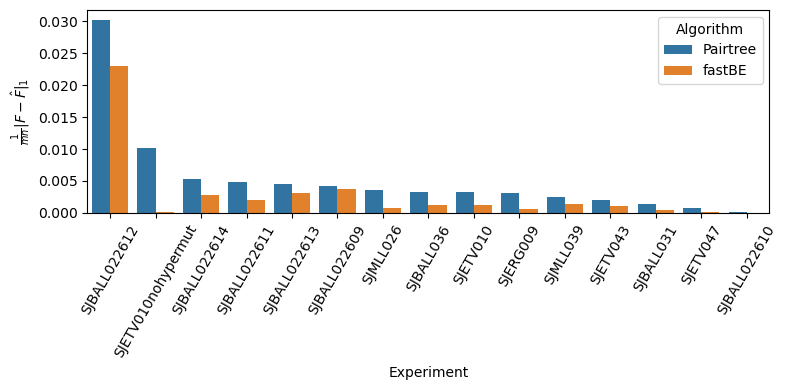

In [13]:
l1_mask = l1_error_df['experiment'].str.contains('POP66') | l1_error_df['experiment'].str.contains('CSC28')

fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(data=l1_error_df[~l1_mask].sort_values(by='value', ascending=False), x='experiment',y='value', hue='variable', ax=ax)
ax.set_xlabel('Experiment')
ax.set_ylabel('$\\frac{1}{mn}|F-\hat{F}|_1$')
for tick in ax.get_xticklabels():
    tick.set_rotation(60)

handles, labels = ax.get_legend_handles_labels()
print(labels)
ax.legend(title='Algorithm', loc='upper right', handles=handles, labels=['Pairtree', 'fastBE'])
    
fig.tight_layout()
fig.savefig("../results/figures/real_data_normalized_l1_error.pdf")

['pt_total_sum_condition_violation', 'am_total_sum_condition_violation']


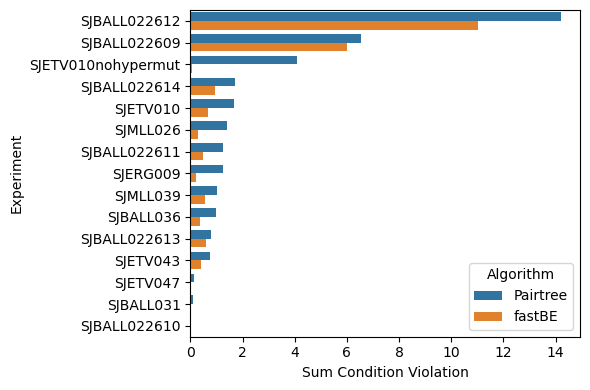

In [14]:
sum_cond_df = sparsity_df[['experiment','am_total_sum_condition_violation','pt_total_sum_condition_violation']].melt(id_vars='experiment')
sum_cond_mask = sum_cond_df['experiment'].str.contains('POP66') | sum_cond_df['experiment'].str.contains('CSC28')

fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(data=sum_cond_df[~sum_cond_mask].sort_values(by='value', ascending=False), y='experiment',x='value', hue='variable', ax=ax)
ax.set_ylabel('Experiment')
ax.set_xlabel('Sum Condition Violation')

handles, labels = ax.get_legend_handles_labels()
print(labels)
ax.legend(title='Algorithm', loc='lower right', handles=handles, labels=['Pairtree', 'fastBE'])
    
fig.tight_layout()
fig.savefig("../results/figures/real_data_ball_sum_cond_violation.pdf")

In [107]:
sum_cond_df[~l0_mask].groupby('variable').describe()

value                                      \
                                 count     mean       std     min      25%   
variable                                                                     
am_total_sum_condition_violation  15.0  1.44738  3.035669  0.0000  0.14325   
pt_total_sum_condition_violation  15.0  2.39822  3.679988  0.0131  0.78105   

                                                           
                                     50%     75%      max  
variable                                                   
am_total_sum_condition_violation  0.4218  0.6306  11.0274  
pt_total_sum_condition_violation  1.2367  1.7003  14.2254

In [20]:
sum_cond_df[~sum_cond_mask].sort_values(by='experiment', ascending=False)

,experiment,variable,value
9,SJMLL039,am_total_sum_condition_violation,0.5593
24,SJMLL039,pt_total_sum_condition_violation,1.0352
26,SJMLL026,pt_total_sum_condition_violation,1.3856
11,SJMLL026,am_total_sum_condition_violation,0.2865
20,SJETV047,pt_total_sum_condition_violation,0.1394
5,SJETV047,am_total_sum_condition_violation,0.0186
17,SJETV043,pt_total_sum_condition_violation,0.7631
2,SJETV043,am_total_sum_condition_violation,0.4218
7,SJETV010nohypermut,am_total_sum_condition_violation,0.0729
22,SJETV010nohypermut,pt_total_sum_condition_violation,4.0993


In [27]:
csc_pop_instances = list(filter(lambda x: x['experiment'] in ['POP66', 'CSC28'], instances))

dfs = []
for inst in csc_pop_instances:
    name = inst['experiment']
    
    for algorithm, usage_matrix in [('AlleleMinima', inst['am_usage']), ('Pairtree', inst['pt_usage'])]:
        result = {}
        shannon_diversity = -np.log(usage_matrix) * usage_matrix
        shannon_diversity[np.isnan(shannon_diversity)] = 0
        shannon_diversity = np.sum(shannon_diversity, axis=1)
        result['Shannon Diversity'] = shannon_diversity
        result['Sample'] = inst['samples'][0].to_list()
        df = pd.DataFrame(result)
        df['Patient'] = name
        df['Algorithm'] = algorithm
        dfs.append(df)
    
shannon_diversity_df = pd.concat(dfs)

/tmp/ipykernel_1939800/2997829746.py:9: RuntimeWarning: divide by zero encountered in log
  shannon_diversity = -np.log(usage_matrix) * usage_matrix
/tmp/ipykernel_1939800/2997829746.py:9: RuntimeWarning: invalid value encountered in multiply
  shannon_diversity = -np.log(usage_matrix) * usage_matrix
/tmp/ipykernel_1939800/2997829746.py:9: RuntimeWarning: divide by zero encountered in log
  shannon_diversity = -np.log(usage_matrix) * usage_matrix
/tmp/ipykernel_1939800/2997829746.py:9: RuntimeWarning: invalid value encountered in multiply
  shannon_diversity = -np.log(usage_matrix) * usage_matrix
/tmp/ipykernel_1939800/2997829746.py:9: RuntimeWarning: divide by zero encountered in log
  shannon_diversity = -np.log(usage_matrix) * usage_matrix
/tmp/ipykernel_1939800/2997829746.py:9: RuntimeWarning: invalid value encountered in multiply
  shannon_diversity = -np.log(usage_matrix) * usage_matrix
/tmp/ipykernel_1939800/2997829746.py:9: RuntimeWarning: divide by zero encountered in log
  sh

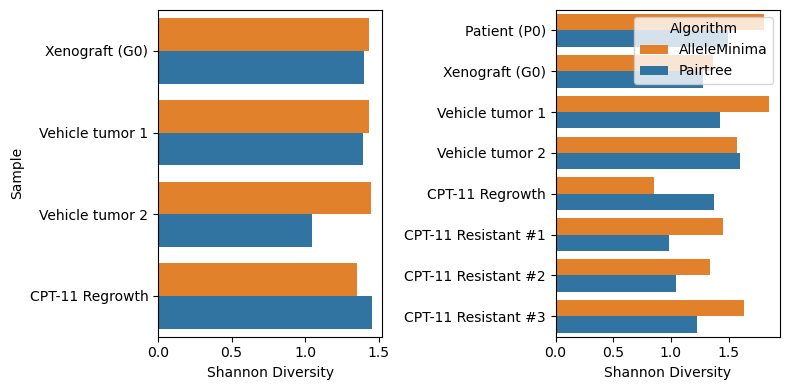

In [28]:
algorithm_color_map = {
    'Pairtree': sns.color_palette()[0],
    'AlleleMinima': sns.color_palette()[1],
    'calder': sns.color_palette()[2],
    'citup': sns.color_palette()[3]
}

fig, axes = plt.subplots(figsize=(8, 4), ncols=2)
sns.barplot(data=shannon_diversity_df[shannon_diversity_df['Patient'] == 'CSC28'], x='Shannon Diversity', y='Sample', hue='Algorithm', ax=axes[0], palette=algorithm_color_map)
sns.barplot(data=shannon_diversity_df[shannon_diversity_df['Patient'] == 'POP66'], x='Shannon Diversity', y='Sample', hue='Algorithm', ax=axes[1], palette=algorithm_color_map)

axes[1].set_ylabel(None)
axes[0].get_legend().remove()
axes[1].legend(title='Algorithm', loc='upper right')

fig.tight_layout()
fig.savefig("../results/figures/diversity_index.pdf", transparent=True, )

In [77]:
dfs = []
for inst in csc_pop_instances:
    name = inst['experiment']
    
    for algorithm, usage_matrix, clonal_matrix, tree in [('AlleleMinima', inst['am_usage'], inst['am_clonal'], inst['am']), ('Pairtree', inst['pt_usage'], inst['pt_clonal'], inst['pt'])]:
        result = {}
        l2_error = np.square(inst['frequency_matrix'] - usage_matrix @ clonal_matrix)
        l2_error = l2_error.sum(axis = 1)
        sum_cond_violation = compute_sum_condition_violation(tree, inst['frequency_matrix'])
        
        result['Sum Condition Violation'] = sum_cond_violation
        result['Squared Sample Error'] = l2_error
        result['Sample'] = inst['samples'][0].to_list()
        df = pd.DataFrame(result)
        df['Patient'] = name
        df['Algorithm'] = algorithm
        dfs.append(df)
sample_error_df = pd.concat(dfs)

[[0.4774 0.0584 0.     0.     0.0345 0.     0.163  0.     0.     0.0667
  0.2    0.    ]
 [0.0162 0.     0.     0.0574 0.     0.     0.4371 0.1133 0.2689 0.1071
  0.     0.    ]
 [0.1075 0.     0.     0.     0.     0.1144 0.2086 0.4362 0.     0.1333
  0.     0.    ]
 [0.0082 0.0056 0.0833 0.     0.     0.     0.364  0.2818 0.     0.
  0.     0.2571]]
[[0.4535 0.0239 0.     0.     0.0345 0.     0.2214 0.     0.     0.0667
  0.2    0.    ]
 [0.4558 0.     0.     0.0574 0.     0.     0.     0.1707 0.2115 0.1046
  0.     0.    ]
 [0.5437 0.     0.     0.     0.     0.1144 0.     0.3127 0.     0.0292
  0.     0.    ]
 [0.3722 0.0889 0.0833 0.     0.     0.     0.     0.2818 0.     0.
  0.     0.1738]]
[[0.0348 0.     0.     0.3047 0.     0.     0.     0.     0.     0.
  0.     0.209  0.1908 0.     0.     0.0461 0.     0.     0.     0.
  0.     0.     0.0592 0.0378 0.     0.1176 0.    ]
 [0.     0.     0.     0.     0.     0.     0.0686 0.0561 0.     0.
  0.     0.     0.     0.4507 0.0493 0

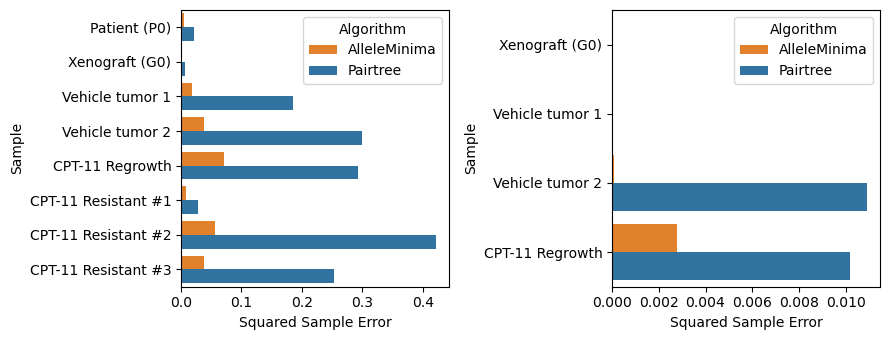

In [30]:
fig, axes = plt.subplots(figsize=(9, 3.5), ncols=2)
sns.barplot(data=sample_error_df[sample_error_df['Patient'] == 'POP66'], x='Squared Sample Error', y='Sample', hue='Algorithm', ax=axes[0], palette=algorithm_color_map)
sns.barplot(data=sample_error_df[sample_error_df['Patient'] == 'CSC28'], x='Squared Sample Error', y='Sample', hue='Algorithm', ax=axes[1], palette=algorithm_color_map)

fig.tight_layout()
fig.savefig("../results/figures/squared_sample_error.pdf", transparent=True)

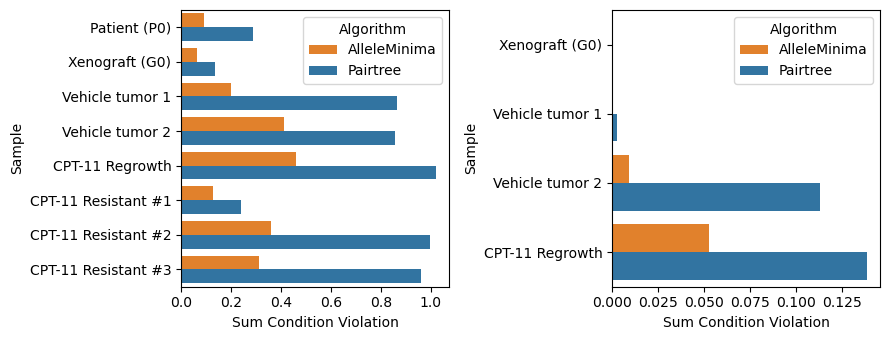

In [66]:
fig, axes = plt.subplots(figsize=(9, 3.5), ncols=2)
sns.barplot(data=sample_error_df[sample_error_df['Patient'] == 'POP66'], x='Sum Condition Violation', y='Sample', hue='Algorithm', ax=axes[0], palette=algorithm_color_map)
sns.barplot(data=sample_error_df[sample_error_df['Patient'] == 'CSC28'], x='Sum Condition Violation', y='Sample', hue='Algorithm', ax=axes[1], palette=algorithm_color_map)

fig.tight_layout()
fig.savefig("../results/figures/sum_cond_violation.pdf", transparent=True)

In [106]:
for row in csc_pop_instances[0]['am_usage']:
    for i, e in enumerate(row[1:]):
        end = " & " if i + 2 != len(row) else ""
        if e == 0:
            print("-    ", end=end)
        else:
            print(f"{e:.3f}", end=end)
    print("\\\\")
    
print()
for row in csc_pop_instances[0]['pt_usage']:
    for e in row:
        print(f"{e:.3f}", end=" & ")
    print()

0.058 & -     & -     & 0.035 & -     & 0.163 & -     & -     & 0.067 & 0.200 & -    \\
-     & -     & 0.057 & -     & -     & 0.437 & 0.113 & 0.269 & 0.107 & -     & -    \\
-     & -     & -     & -     & 0.114 & 0.209 & 0.436 & -     & 0.133 & -     & -    \\
0.006 & 0.083 & -     & -     & -     & 0.364 & 0.282 & -     & -     & -     & 0.257\\

0.454 & 0.024 & 0.000 & 0.000 & 0.035 & 0.000 & 0.221 & 0.000 & 0.000 & 0.067 & 0.200 & 0.000 & 
0.456 & 0.000 & 0.000 & 0.057 & 0.000 & 0.000 & 0.000 & 0.171 & 0.212 & 0.105 & 0.000 & 0.000 & 
0.544 & 0.000 & 0.000 & 0.000 & 0.000 & 0.114 & 0.000 & 0.313 & 0.000 & 0.029 & 0.000 & 0.000 & 
0.372 & 0.089 & 0.083 & 0.000 & 0.000 & 0.000 & 0.000 & 0.282 & 0.000 & 0.000 & 0.000 & 0.174 & 
